In [ ]:
'''
Objectives


1. Load the data as a pandas dataframe

2. Clean the data, taking care of the blank entries

3. Run exploratory data analysis (EDA) and identify 
 the attributes that most affect the charges

4. Develop single variable and multi variable Linear Regression models for predicting the charges

5. Use Ridge regression to refine the performance of Linear regression models.

'''

'''

For this lab, we will be using the following libraries:

skillsnetwork to download the data

pandas for managing the data.

numpy for mathematical operations.

sklearn for machine learning and machine-learning-pipeline related functions.

seaborn for visualizing the data.

matplotlib for additional plotting tools.
'''



In [285]:
#importing required libraries needed for our analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split


In [ ]:
DATA EXTRACTION

In [10]:
#create a function that will get the data from a url and allows us to write
#it on a file called insurance
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

# We call the function 

download(url, filename)

In [5]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
filename = "insurance.csv"

In [11]:
# We use pandas to extract the data from the file and create a dataframe
df = pd.read_csv(filename, header=None) #-->>

In [12]:
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [ ]:
# We see the data extracted has no columns names as headers 
#which makes it hard to read
# we can add names to the columns knowing the following information

'''
Age in years = integers

Gender = {female = 1 , male = 2}

BMI or Body mass index = float

no_of_children = integer

Smoker = {Yes = 1, No = 0}

US Region, NW, NE, SW, SE = {1,2,3,4} respectively

Charges Annual insurance charges = float

'''


In [13]:
headers = ['Age','Gender','BMI','no_of_children','Smoker','Region','Charges']
df.columns = headers

In [15]:
df.head(5)


,Age,Gender,BMI,no_of_children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [21]:
## Once we have our data and it looks better, we still need to perform some
# data cleaning process, we can see in the row number 4 column smoker has a value of '?' which means meissing data
# we would need to fix that.

# first we are going to replace the ? values

df.replace('?', np.nan, inplace = True)
df.head(5)

,Age,Gender,BMI,no_of_children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160


In [26]:
# We want to see what format this columns have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [49]:
# We see that the total of rows are 2771 not including the header
#nan = Not a number |  Non = No data | Null = No data 
# Columns like Age and Smoker have either missing data or incorrect formatting
# to address that we can do the following

empty_cells = df.isna().sum()

print(empty_cells)


Age               4
Gender            0
BMI               0
no_of_children    0
Smoker            7
Region            0
Charges           0
dtype: int64


In [77]:

#replace missing values with the mean (age) since its continuos
# and frecuency (smoker) since it's categorical

mean_age = df["Age"].astype('float').mean(axis=0)
print(f"The average age is {int(mean_age)} years old.")
df["Age"].replace(np.nan, mean_age, inplace=True)

# smoker is a categorical attribute, replace with most frequent entry

is_smoker = df["Smoker"].value_counts()
print(is_smoker)

is_smoker = df["Smoker"].value_counts().idxmax()
df["Smoker"].replace(np.nan, is_smoker, inplace =True)

print(f"The majority of people {is_smoker}.")

# We update the data type to integers
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")

The average age is 39 years old.
Smoker
0    2208
1     563
Name: count, dtype: int64
The majority of people 0.


C:\Users\VAR0\AppData\Local\Temp\ipykernel_21196\2979799117.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].replace(np.nan, mean_age, inplace=True)
C:\Users\VAR0\AppData\Local\Temp\ipykernel_21196\2979799117.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   int32  
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   Smoker          2771 non-null   int32  
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [ ]:
# Now we can see we have taken care of missing values.

In [81]:
# Round the charges to 2 decimasl

df["Charges"] = np.round(df["Charges"],2)
df.head()

,Age,Gender,BMI,no_of_children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


In [84]:
# Now we dive into the EDA (Exploratory Data Analysis)
# We can see some descriptive statistics details
# THIS IS THE CORRELATION MATRIX FOR THE DATASET
df.describe().round()

,Age,Gender,BMI,no_of_children,Smoker,Region,Charges
count,2771.0,2771.0,2771.0,2771.0,2771.0,2771.0,2771.0
mean,39.0,2.0,31.0,1.0,0.0,3.0,13260.0
std,14.0,1.0,6.0,1.0,0.0,1.0,12154.0
min,18.0,1.0,16.0,0.0,0.0,1.0,1122.0
25%,26.0,1.0,26.0,0.0,0.0,2.0,4688.0
50%,39.0,2.0,30.0,1.0,0.0,3.0,9305.0
75%,51.0,2.0,35.0,2.0,0.0,4.0,16517.0
max,64.0,2.0,53.0,5.0,1.0,4.0,63770.0


<Axes: xlabel='Charges', ylabel='BMI'>

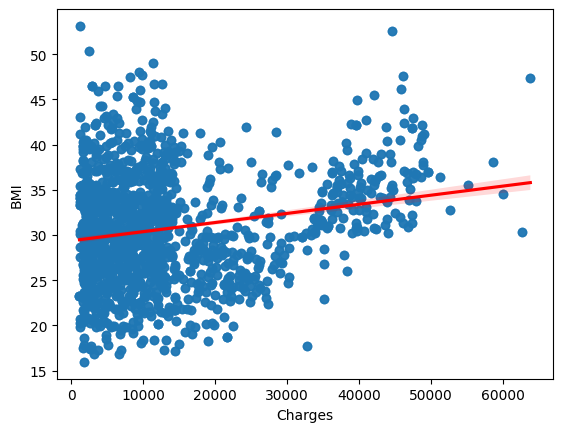

In [90]:
# We can implement a regression to see the charges with respect to BMI
sns.regplot(x="Charges", y="BMI", data = df ,line_kws={"color":"red"})

In [115]:
"""
We can see there is a correlation and it seems to be
 a positive linear relationship, let's deep into it.

"""
#we can also identify how strong is that relationship

pearson_coef , p_value = stats.pearsonr(df["BMI"],df["Charges"])
print(f"Pearson Coefficient: {round(pearson_coef,4)}\nP Value: {p_value}")

Pearson Coefficient: 0.1999
P Value: 2.2609643553236173e-26


In [ ]:
""" 
 The pearson coefficient is 0.199 
    This indicates us the strengh of the relationship, since the value is
    close to 0 indicates that there is a very weak positive linear relationship
    between the two variables.

 The P value is 2.24e-26 (which is extremely small)
    Since the P value is extremely small, the statistical significante says
    there is a correlation between these two variables.
"""

"""
  CONCLUSION
      Although the correlation is statistically significant, the actual strength 
      of the relationship is very weak. This means that shilw the correlation is
      unlikely to be due to random chance, it is not strong enough to have a 
      meaningful practical impact.
"""

<Axes: xlabel='Smoker', ylabel='Charges'>

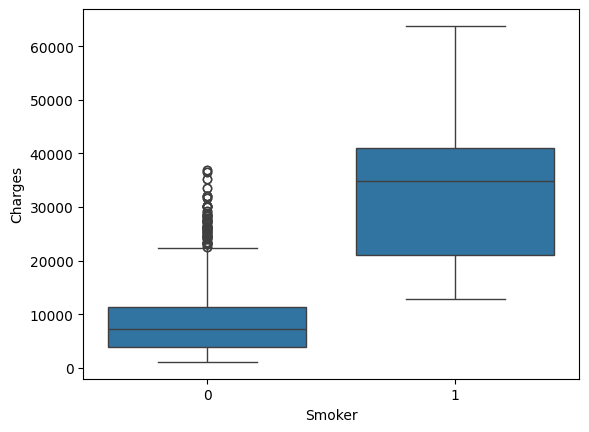

In [119]:
# We can analyze over different data 
sns.boxplot(x="Smoker",y="Charges", data = df)

In [121]:
"""
 If we use a BOXPLOT here it will help us visualize these correlations
 but only between Smokers and no Smokers
"""
pearson_coef , p_value = stats.pearsonr(df["Smoker"],df["Charges"])
print(f"Pearson Coefficient: {round(pearson_coef,4)}\nP Value: {p_value}")

Pearson Coefficient: 0.7891
P Value: 0.0


In [ ]:
"""
    Pearson coefficient indicates a strong correlation
    P value indicates the correlation is statistical significant 

    Since we have a strong positive linear relationship between the variables
    and this relationship is statistically significant

    This suggests that there is a robust and reliable association between the
    variables, and it is unlikely to be due to random fluctuation in the data.
"""

In [ ]:
# We calculate R squared score to start building our model

In [123]:
x=df[["Smoker"]]
y=df["Charges"]
lm = LinearRegression()
lm.fit(x,y)
print(lm.score(x,y))

0.6227430402464125


In [ ]:
"""
    Now we would like to fit a linear regression model that may be use to 
    predict the charges values
"""

In [124]:
z = df[["Age","Gender","BMI","no_of_children","Smoker","Region"]]
lm.fit(z,y)
print(lm.score(z,y))

0.7505888664568174


In [ ]:
""" 
    R squared value of 0.75059 tell us that the 75% of the variance in
    the dependent varibale (Charge) is explained by the model.
"""

"""
    Now we want to train a pipeline by using
    
    Standard Scaler: A technique that contributes with the interpretability
    and performance of machine learning models

   Polynomial Features: Mathematical expression that will help us to interact
   with no-linear relationships between the feature and the target variable.

    Linear Regression: A statistical model that estimates the linear relationship
    between two variables.
"""

In [134]:
Input = [('Scale', StandardScaler()),
         ('Polynomial',PolynomialFeatures(include_bias=False)),
         ('Model',LinearRegression())]
pipe=Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)
print(r2_score(y,ypipe))

0.8453714504367094


In [ ]:
#PipeLine is a utility in scikit-learn that allows us to combine multiple 
#processing steps into a single object. It ensures that each step in the
#pipeline is executed in the correct order.

#Pipeline.fit(z,y) fits the pipeline to the data, it means 
# 1. Scales the data
# 2. Generates polynomial features
# 3. fits the linear regression model to the processed data.

# Pipeline.predict(z) uses the fitted pipeline to make predictions on 
# the data z. This involves applying the same scaling and polynomial 
# transformation to the input data before predicting with the linear regression
# model.

# r2_score Evaluates how well the model's prediction match the actual data.

In [ ]:
"""
    Now that we have a 0.8453 R squared value, this indicates us that
    the 85.54% of the variance in the independent variable (Charges)
    is explained by the features (Age,BMI,smoker,etc...)
    in our regression model.

    A high r squared value indicates that the model is doing a good job at
    capturing the relationship between the input features and the target
    variables.
"""

In [ ]:
"""
 Now we want to refine out model
"""

In [ ]:
## We will split the data into training and testing subsets, assuming that
# 20% of the data will be reserved for testing

In [556]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)

In [557]:
## We now use Ridge regression, it is a type of linear regression that 
# help us with the overfitting .

RidgeModel = Ridge(alpha = 0.1) #Alpha is the regularization parameter
RidgeModel.fit(x_train,y_train) # --> Train

yhat = RidgeModel.predict(x_test) # --> Predicts

print(r2_score(y_test,yhat))


0.7254198858412229


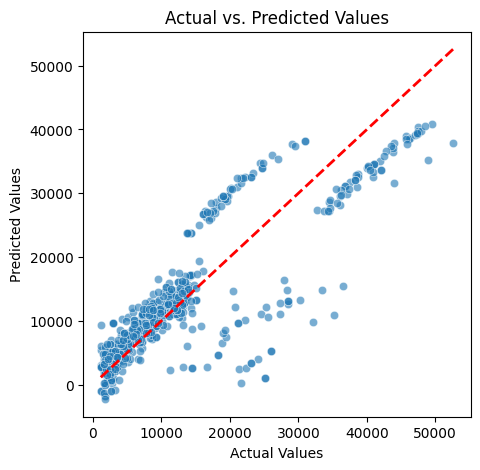

In [559]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=yhat, alpha=0.6)

# Plotting the line of equality
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
"""
    0.7254 indicates that our Ridge Regression model explains 72.54%
    of the variance in the test data. This is good since our model is 
    capturing a significant portion of the underlying patters in the data,
    though is still some room for improvement.
"""

In [560]:
# We will apply polynomial transformation to the training parameters 
# with degree = 2

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(y_hat.mean())
print(r2_score(y_test,y_hat))

13225.834332540537
0.8208413195172467


In [561]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(y_hat.mean())
print(r2_score(y_test,y_hat))

13225.834332540537
0.8208413195172467


In [ ]:
"""
    Now that we have used polynomial features and retrain we can see an
    improvement in our R squared value that now means that our Ridge
    Model explains 82.09% of the variance in the test data.
"""

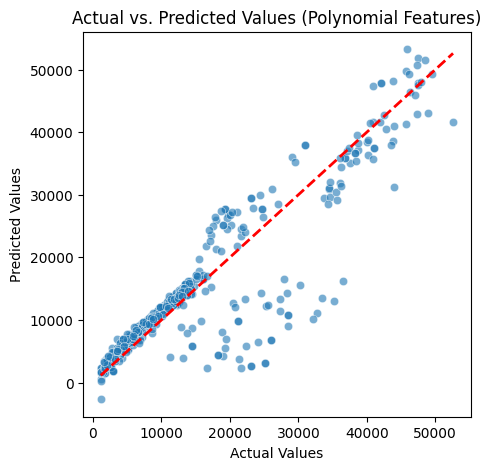

In [562]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)

# Plotting the line of equality
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Polynomial Features)')
plt.show()

In [563]:
cv_scores = cross_val_score(RidgeModel, x_train_pr, y_train, cv=2)
y_hat = cross_val_predict(RidgeModel, x_train_pr, y_train, cv=2)
# Output the scores for each fold and the mean score
#print("Cross-validation scores for each fold:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Average Y predicted by the model:", y_hat.mean())

Average cross-validation score: 0.8462707898985914
Average Y predicted by the model: 13264.327071369797


In [ ]:
"""
    It's very interesting to see that with a 7 degree polynomial we have a higher test mean squeared error, that ends up
    being overfitting
"""

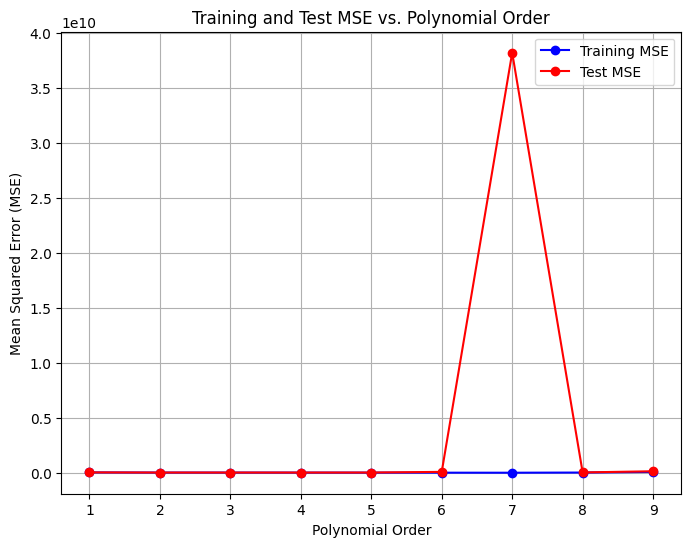

In [540]:
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_mse_scores, marker='o', linestyle='-', color='b', label='Training MSE')
plt.plot(degrees, test_mse_scores, marker='o', linestyle='-', color='r', label='Test MSE')
plt.xlabel('Polynomial Order')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Test MSE vs. Polynomial Order')
plt.legend()
plt.grid(True)
plt.show()

-1681.5318165175947
-271.72505476195425


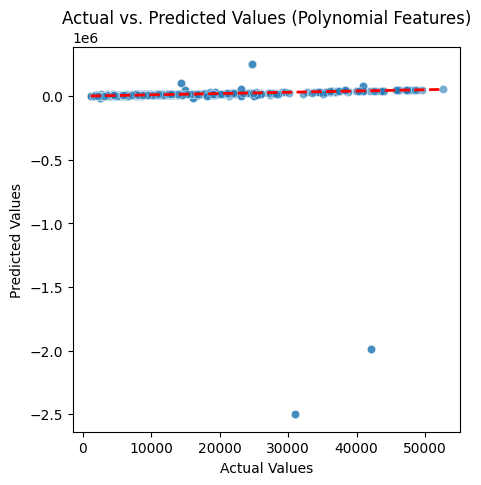

In [564]:
pr = PolynomialFeatures(degree=7)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(y_hat.mean())
print(r2_score(y_test,y_hat))
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)

# Plotting the line of equality
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Polynomial Features)')
plt.show()